In [6]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [7]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lend_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
lend_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [40]:
# check for imbalance
lend_df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [8]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lend_df.loan_status

# Separate the X variable, the features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']
X = lend_df.loc[:, features]

In [9]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [10]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [30]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) 

In [17]:
# SCALE

# subset
df_sub = lend_df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [31]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
log_reg = LogisticRegression(random_state=1)

# Do Machine Learning
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [32]:
# Make a prediction using the testing data
test_preds = log_reg.predict(X_test)
test_proba = log_reg.predict_proba(X_test)[:, 1]

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

Confusion Matrix: 
    [[18673    86]
 [   32   593]]


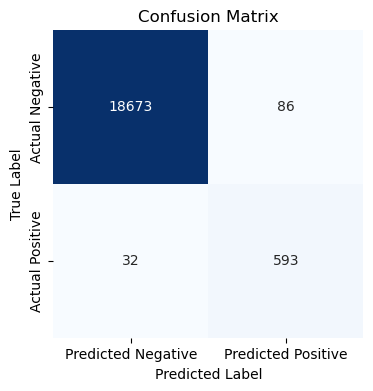

In [33]:
# Generate a confusion matrix for the model
test_cf = confusion_matrix(y_test, test_preds)
    
print(f"""Confusion Matrix: 
    {test_cf}""")

# Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
# Print the classification report for the model
test_cr = classification_report(y_test, test_preds)

print(f"""Classification Report:
    {test_cr}""")

Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.99      0.99     19384



AUC: 0.9963734527426835


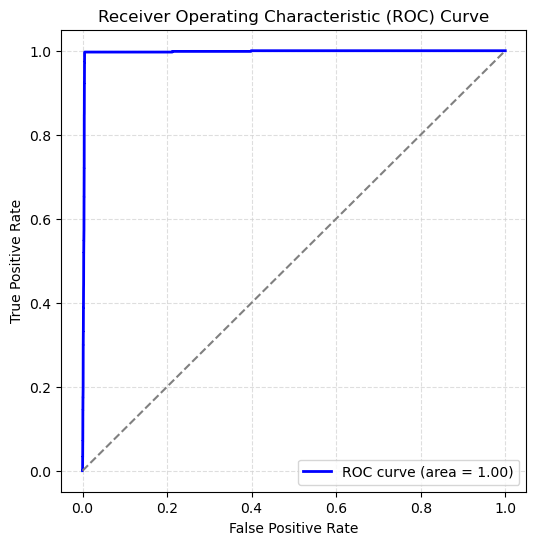

In [34]:
# Visualize the ROC curve
test_auc = roc_auc_score(y_test, test_proba)
print(f"""AUC: {test_auc}""")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test.values, test_proba)

# Set figure size
plt.figure(figsize=(6, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add grid and legend
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")

# Display the plot
plt.show()

In [35]:
ada = AdaBoostClassifier(random_state=1)

# Do Machine Learning
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [36]:
test_preds = ada.predict(X_test)
test_proba = ada.predict_proba(X_test)[:, 1]

Confusion Matrix: 
    [[18669    90]
 [    5   620]]


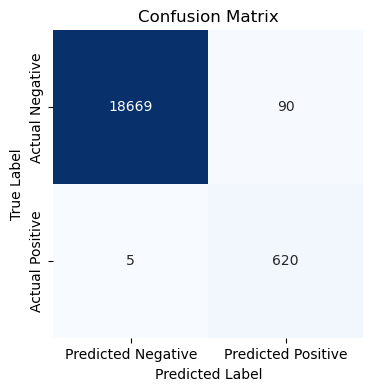

In [41]:
# Generate a confusion matrix for the model
test_cf = confusion_matrix(y_test, test_preds)
    
print(f"""Confusion Matrix: 
    {test_cf}""")

# Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
# Print the classification report for the model
test_cr = classification_report(y_test, test_preds)

print(f"""Classification Report:
    {test_cr}""")

Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



AUC: 0.9964305986459833


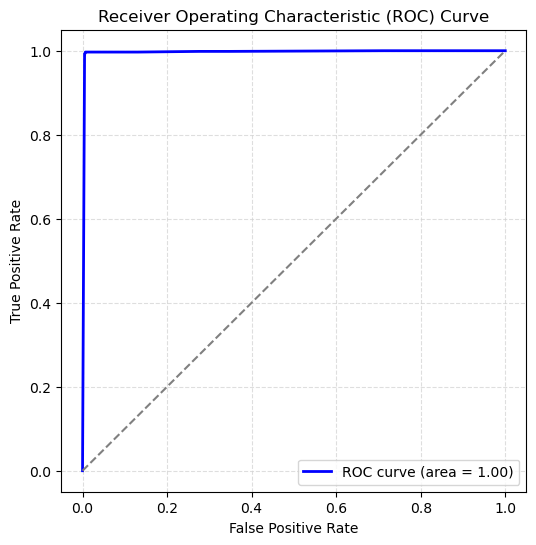

In [43]:
# Visualize the ROC curve
test_auc = roc_auc_score(y_test, test_proba)
print(f"""AUC: {test_auc}""")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test.values, test_proba)

# Set figure size
plt.figure(figsize=(6, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add grid and legend
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
plt.legend(loc="lower right")

# Display the plot
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** It fits too well meaning it is overfit. Generally I find logistical regressions to have good recall and f1 scores. The tests are not perfect, which is good because perfection is when errors are made, but there is a higher posibility of being rejected for credit when in actuality you would have made the payments and not defaulted. 

---